- **Students**: Parisa Khanjani
- **Professor**: Mohammed Ayoub Alaoui Mhamdi
- **University**: Bishop's University
- **Semester**: Fall 2023
- **Final Project**: Data Mining


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn import tree

Loading the dataset:

In [ ]:
diabetes_dataset = pd.read_csv('/content/diabetes1.csv')
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Separating features and target:

In [ ]:
features = diabetes_dataset.drop('Outcome', axis=1)
target = diabetes_dataset['Outcome']

features.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [ ]:
label.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
features.shape

(768, 8)

Splitting data for training and testing

In [ ]:
# Splitting data for training and testing
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.7)

MLP Classifier setup

In [ ]:
mlp_model = MLPClassifier(solver='lbfgs', alpha=1, tol=5e-3)
mlp_model.fit(features_train, target_train)
mlp_model.score(features_test, target_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


0.6821561338289963

In [ ]:
params_mlp = {
    'hidden_layer_sizes': [(5,7), (20,22), (50,65), (100,110), (150,160)],
    'alpha': [0.0001, 0.001, 0.01, 1, 2, 4],
    'max_iter': [300, 350, 400, 500],
    'activation': ['relu', 'logestic', 'identity', 'tanh']
}
grid_search_mlp = GridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3, random_state=1234),
                               params_mlp, refit=True, cv=5)
grid_search_mlp.fit(features_train, target_train)

# Displaying the best model's details
print(f" the best estimator of model is:  {grid_search_mlp.best_estimator_}")
print(f" the best score of model is:  {grid_search_mlp.best_score_}")
print(f" the best parameter of model is:  {grid_search_mlp.best_params_}")
print(f" max of mean_test_score is:   {max(grid_search_mlp.cv_results_['mean_test_score'])}")

Streaming output truncated to the last 5000 lines.
Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

 the best estimator of model is:  MLPClassifier(activation='identity', hidden_layer_sizes=(5, 7), max_iter=300,
              random_state=1234, solver='lbfgs', tol=0.005)
 the best score of model is:  0.773913043478261
 the best parameter of model is:  {'activation': 'identity', 'alpha': 0.0001, 'hidden_layer_sizes': (5, 7), 'max_iter': 300}
 max of mean_test_score is:   0.773913043478261


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
cv_scores = [GridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3, random_state=1234),
                          params_mlp, refit=True, cv=cv_number).fit(features_train, target_train).best_score_
             for cv_number in range(2, 10)]

print(f" max gscore is: {max(cv_scores)}")

Streaming output truncated to the last 5000 lines.
Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing

 max gscore is: 0.8177777777777778


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [ ]:
cv_scores

[0.8043478260869565,
 0.8046251993620416,
 0.8133696309739866,
 0.8043478260869567,
 0.7962213225371121,
 0.8046536796536797,
 0.7924876847290641,
 0.8177777777777778]

In [ ]:
max(cv_scores)

0.8177777777777778

In [ ]:
random_search_params = {
    'hidden_layer_sizes': [(5,7), (20,22), (50,65), (100,110), (150,160)],
    'alpha': [0.0001, 0.001, 0.01, 1, 2, 4],
    'max_iter': [300, 350, 400, 500],
    'activation': ['relu', 'logestic', 'identity', 'tanh']
}
random_scores = [RandomizedSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3, random_state=1234),
                                    random_search_params, n_jobs=-1, random_state=123,
                                    refit=True, n_iter=100, cv=cv_number).fit(features_train, target_train).best_score_
                 for cv_number in range(2, 10)]

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
46 fits failed out of a total of 200.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
46 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 752, in fit
    return self._fit(X, y, incremental=False)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py", line 384, in _fit
    self._validate_hyperparameters()
  F

In [ ]:
max(random_scores)

0.7781385281385281

In [ ]:
halving_search_params = random_search_params.copy()
halving_scores = [HalvingGridSearchCV(MLPClassifier(solver='lbfgs', tol=5e-3, random_state=1234),
                                      halving_search_params, n_jobs=-1, random_state=541,
                                      refit=True, factor=cv_number).fit(features_train, target_train).best_score_
                  for cv_number in range(2, 10)]

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:549: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

I

In [ ]:
max(halving_scores)

0.8084415584415584

**Decission Tree Algorithm**

0.7467532467532467

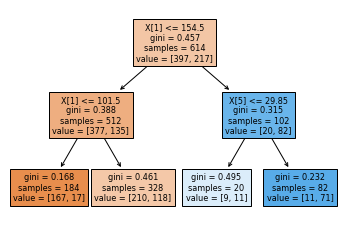

In [ ]:
features_train, features_test, target_train, target_test = train_test_split(features, target, train_size=0.8, random_state=1236)
decision_tree_model = DecisionTreeClassifier(max_depth=2, min_samples_leaf=1)
decision_tree_model.fit(features_train, target_train)
tree.plot_tree(decision_tree_model, filled=True)
decision_tree_model.predict(features_test)
decision_tree_model.score(features_test, target_test)

In [ ]:
tree_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': list(range(1, 100, 5)),
    'min_samples_leaf': list(range(1, 100, 5)),
    'class_weight': ['balanced', {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 0.5, 1: 0.5}]
}

tree_grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=tree_params, cv=4)
tree_grid_search.fit(features_train, target_train)

print(f" the best estimator of model is:  {tree_grid_search.best_estimator_}")
print(f" the best score of model is:  {tree_grid_search.best_score_}")
print(f" the best parameter of model is:  {tree_grid_search.best_params_}")
print(f" max of mean_test_score is:   {max(tree_grid_search.cv_results_['mean_test_score'])}")

 the best estimator of model is:  DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=7, min_samples_leaf=61, random_state=42)
 the best score of model is:  0.7508169934640523
 the best parameter of model is:  {'class_weight': {0: 0.5, 1: 0.5}, 'criterion': 'entropy', 'max_depth': 7, 'min_samples_leaf': 61}
 max of mean_test_score is:   0.7508169934640523


In [ ]:
GS = RandomizedSearchCV(clf,param_distributions=par ,n_iter=200 ,cv=4)
GS.fit(X_train, y_train)
print(f" the best estimator of model is:  {GS.best_estimator_}")
print(f" the best score of model is:  {GS.best_score_}")
print(f" the best parameter of model is:  {GS.best_params_}")
print(f" max of mean_test_score is:   {max(GS.cv_results_['mean_test_score'])}")

 the best estimator of model is:  DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=76, min_samples_leaf=56, random_state=42)
 the best score of model is:  0.7524509803921569
 the best parameter of model is:  {'min_samples_leaf': 56, 'max_depth': 76, 'criterion': 'entropy', 'class_weight': {0: 0.5, 1: 0.5}}
 max of mean_test_score is:   0.7524509803921569


Defining a function

In [ ]:
def calc_weighted_mean_recall(actual, predicted):
    recall_0 = recall_score(actual, predicted, pos_label=0)
    recall_1 = recall_score(actual, predicted, pos_label=1)
    return 0.25 * recall_0 + 0.75 * recall_1

recall_scorer = make_scorer(calc_weighted_mean_recall, greater_is_better=True)

HalvingGridSearchCV for Decision Tree

In [ ]:
halving_tree_params = tree_params.copy()
halving_tree_search = HalvingGridSearchCV(DecisionTreeClassifier(random_state=42),
                                          param_grid=halving_tree_params, cv=4, scoring=recall_scorer)
halving_tree_search.fit(features_train, target_train)
print(f" the best estimator of model is:  {halving_tree_search.best_estimator_}")
print(f" the best score of model is:  {halving_tree_search.best_score_}")

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

 the best estimator of model is:  DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=81, min_samples_leaf=26, random_state=42)
 the best score of model is:  0.7986936201266883


In [ ]:
print(f" the best estimator of model is:  {GS.best_estimator_}")
print(f" the best score of model is:  {GS.best_score_}")

 the best estimator of model is:  DecisionTreeClassifier(class_weight={0: 0.2, 1: 0.8}, criterion='entropy',
                       max_depth=81, min_samples_leaf=26, random_state=42)
 the best score of model is:  0.7986936201266883


Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning:

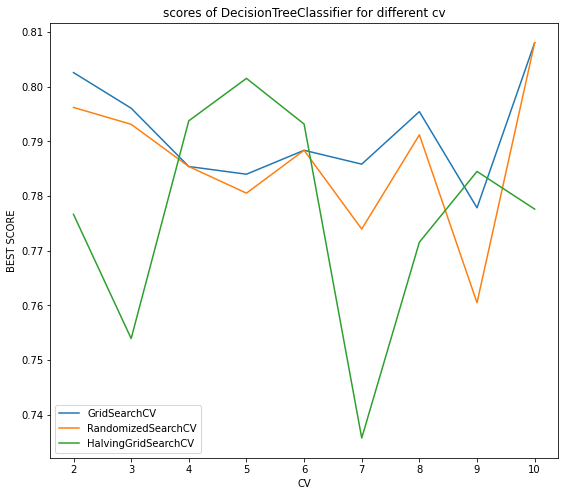

In [ ]:
cv_tree_scores = [GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid=tree_params,
                               cv=cv_number, scoring=recall_scorer).fit(features_train, target_train).best_score_
                  for cv_number in range(2, 11)]
cv_random_scores = [RandomizedSearchCV(DecisionTreeClassifier(random_state=42),
                                       param_distributions=tree_params, n_iter=100, cv=cv_number,
                                       scoring=recall_scorer).fit(features_train, target_train).best_score_
                    for cv_number in range(2, 11)]
cv_halving_scores = [HalvingGridSearchCV(DecisionTreeClassifier(random_state=42),
                                         param_grid=tree_params, cv=cv_number,
                                         scoring=recall_scorer).fit(features_train, target_train).best_score_
                     for cv_number in range(2, 11)]

plt.figure(figsize=(20, 8))
plt.subplot(122)
plt.plot(range(2, 11), cv_tree_scores, label='GridSearchCV')
plt.plot(range(2, 11), cv_random_scores, label='RandomizedSearchCV')
plt.plot(range(2, 11), cv_halving_scores, label='HalvingGridSearchCV')
plt.title("scores of DecisionTreeClassifier for different cv")
plt.xlabel("CV")
plt.ylabel("BEST SCORE")
plt.legend()

In [ ]:
print(f" max score of Halving is: {max(cv_halving_scores)}")
print(f" max score of Random is: {max(cv_random_scores)}")
print(f" max score of Grid is: {max(cv_tree_scores)}")

In [ ]:
svm_model = SVC(class_weight='balanced', kernel='rbf', degree=3, gamma=0.2)
svm_model.fit(features_train, target_train)
svm_model.predict(features_test)
svm_model.score(features_test, target_test)

0.6356877323420075

Grid Search for SVM with rbf kernel

In [ ]:
svm_rbf_params = {
    'gamma': list(np.arange(0.0, 1, 0.001)),
    'class_weight': ['balanced', {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 0.5, 1: 0.5}]
}
rbf_grid_search = GridSearchCV(SVC(), param_grid=svm_rbf_params, cv=4, scoring=recall_scorer)
rbf_grid_search.fit(features_train, target_train)
print(f" the best estimator of model is:  {rbf_grid_search.best_estimator_}")
print(f" the best score of model is:  {rbf_grid_search.best_score_}")

 the best estimator of model is:  SVC(class_weight={0: 0.2, 1: 0.8}, gamma=0.001)
 the best score of model is:  0.828890931372549


Grid Search for SVM with poly kernel

In [ ]:
svm_poly_params = {
    'gamma': [0.001, 0.1, 1],
    'class_weight': ['balanced', {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 0.5, 1: 0.5}]
}
poly_grid_search = GridSearchCV(SVC(kernel='poly', degree=2), param_grid=svm_poly_params, cv=4, scoring=recall_scorer)
poly_grid_search.fit(features_train, target_train)
print(f" the best estimator of model is:  {poly_grid_search.best_estimator_}")
print(f" the best score of model is:  {poly_grid_search.best_score_}")

 the best estimator of model is:  SVC(class_weight={0: 0.2, 1: 0.8}, degree=2, gamma=0.001, kernel='poly')
 the best score of model is:  0.7119601889338731


Grid Search for SVM with linear kernel

In [ ]:
svm_linear_params = {
    'C': list(range(1, 100, 5)),
    'class_weight': ['balanced', {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 0.5, 1: 0.5}]
}
linear_grid_search = GridSearchCV(SVC(kernel='linear'), param_grid=svm_linear_params, cv=4, scoring=recall_scorer)
linear_grid_search.fit(features_train, target_train)
print(f" the best estimator of model is:  {linear_grid_search.best_estimator_}")
print(f" the best score of model is:  {linear_grid_search.best_score_}")

 the best estimator of model is:  SVC(C=81, class_weight={0: 0.2, 1: 0.8}, kernel='linear')
 the best score of model is:  0.7874915654520918


Different cross-validation strategies for SVM with the rbf kernel

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 9 is smaller than n_iter=100. Running 9 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_

Gscores is [0.7943838365211284, 0.8018203783119068, 0.8073232323232323, 0.7993289533545642, 0.7979134578948011, 0.7957913216220273, 0.7974220521541949, 0.8017382154882156, 0.7987635281385282] and max of it is: 0.8073232323232323
Gscores is [0.7943838365211284, 0.8018203783119068, 0.8073232323232323, 0.7993289533545642, 0.7979134578948011, 0.7957913216220273, 0.7974220521541949, 0.8017382154882156, 0.7987635281385282] and max of it is: 0.8073232323232323
Gscores is [0.794253718670428, 0.8048591834374278, 0.8060711806163289, 0.7938405096522553, 0.7982193294693295, 0.7946625571049533, 0.7978556574873539, 0.8010861564754386, 0.7705391866905025] and max of it is: 0.8073232323232323


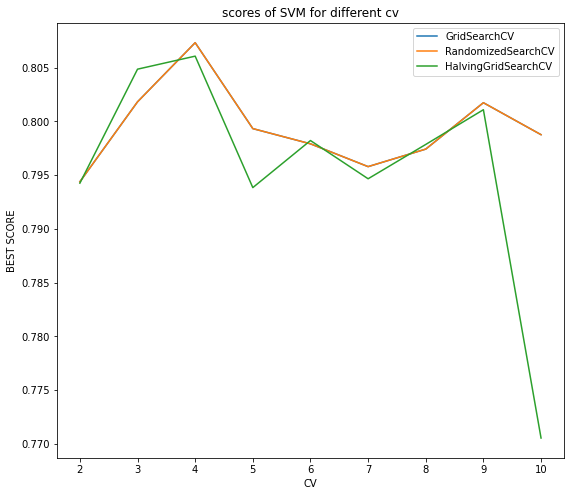

In [ ]:
svm_rbf = SVC(kernel='rbf')
rbf_parameters = {'gamma': [0, 0.001, 0.01], 'class_weight': ['balanced', {0: 0.3, 1: 0.7}, {0: 0.2, 1: 0.8}]}

grid_search_scores = [GridSearchCV(svm_rbf, param_grid=rbf_parameters, cv=cv_index, scoring=my_scorer)
                      .fit(features_train, target_train).best_score_ for cv_index in range(2, 11)]

randomized_search_scores = [RandomizedSearchCV(svm_rbf, param_distributions=rbf_parameters, n_iter=100,
                                               cv=cv_index, scoring=my_scorer).fit(features_train, target_train).best_score_
                            for cv_index in range(2, 11)]

halving_search_scores = [HalvingGridSearchCV(svm_rbf, param_grid=rbf_parameters, cv=cv_index, scoring=my_scorer)
                         .fit(features_train, target_train).best_score_ for cv_index in range(2, 11)]

plt.figure(figsize=(20, 8))
plt.subplot(122)
plt.plot(range(2, 11), grid_search_scores, label='GridSearchCV')
plt.plot(range(2, 11), randomized_search_scores, label='RandomizedSearchCV')
plt.plot(range(2, 11), halving_search_scores, label='HalvingGridSearchCV')
plt.title("scores of SVM for different cv")
plt.xlabel("CV")
plt.ylabel("BEST SCORE")
plt.legend()

In [ ]:
print(f"Gscores is {grid_search_scores} ")
print(f" max of it is: {max(grid_search_scores)}")
print(f"Rscores is {randomized_search_scores} ")
print(f" max of it is: {max(randomized_search_scores)}")
print(f"Hscores is {halving_search_scores} ")
print(f" max of it is: {max(halving_search_scores)}")

Gscores is [0.7943838365211284, 0.8018203783119068, 0.8073232323232323, 0.7993289533545642, 0.7979134578948011, 0.7957913216220273, 0.7974220521541949, 0.8017382154882156, 0.7987635281385282] 
 max of it is: 0.8073232323232323
Rscores is [0.7943838365211284, 0.8018203783119068, 0.8073232323232323, 0.7993289533545642, 0.7979134578948011, 0.7957913216220273, 0.7974220521541949, 0.8017382154882156, 0.7987635281385282] 
 max of it is: 0.8073232323232323
Hscores is [0.794253718670428, 0.8048591834374278, 0.8060711806163289, 0.7938405096522553, 0.7982193294693295, 0.7946625571049533, 0.7978556574873539, 0.8010861564754386, 0.7705391866905025] 
 max of it is: 0.8060711806163289


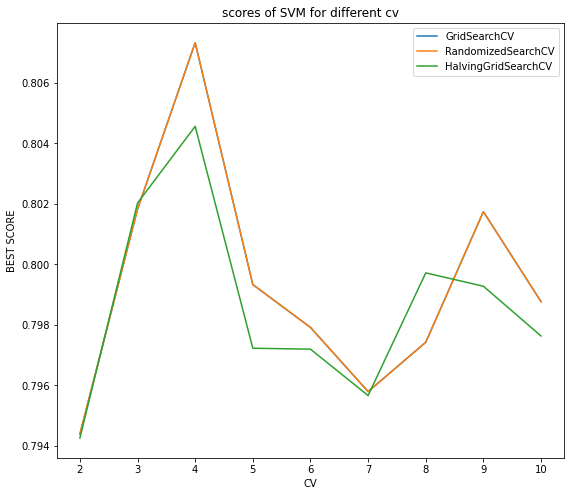

In [ ]:
plt.figure(figsize=(20, 8))
plt.subplot(122)
plt.plot(range(2, 11), grid_search_scores, label='GridSearchCV')
plt.plot(range(2, 11), randomized_search_scores, label='RandomizedSearchCV')
plt.plot(range(2, 11), halving_search_scores, label='HalvingGridSearchCV')
plt.title("scores of SVM for different cv")
plt.xlabel("CV")
plt.ylabel("BEST SCORE")
plt.legend()

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=4, n_jobs=2, weights='distance')
knn_model.fit(features_train, target_train)
knn_model.predict(features_test)
knn_model.score(features_test, target_test)

0.6623376623376623

Grid Search for KNeighbors

In [ ]:
knn_params = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': list(np.arange(1, 15))
}
knn_grid_search = GridSearchCV(KNeighborsClassifier(n_jobs=3), param_grid=knn_params, cv=5)
knn_grid_search.fit(features_train, target_train)
print(f" the best estimator of model is:  {knn_grid_search.best_estimator_}")
print(f" the best score of model is:  {knn_grid_search.best_score_}")

 the best estimator of model is:  KNeighborsClassifier(n_jobs=3, n_neighbors=8, weights='distance')
 the best score of model is:  0.6869565217391305


Text(0, 0.5, 'score')

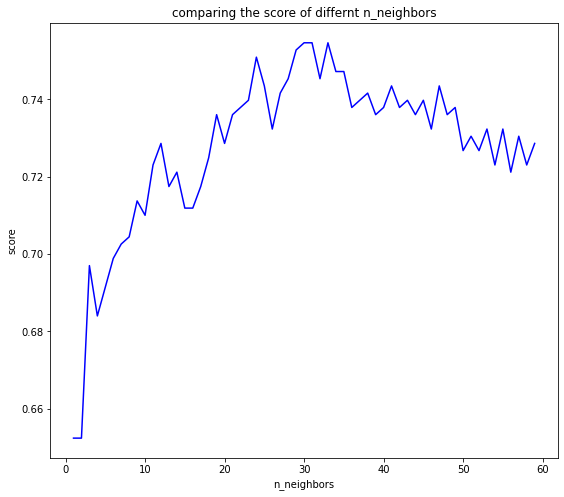

In [ ]:
knn_scores = [KNeighborsClassifier(n_neighbors=n, n_jobs=3, weights='distance').fit(features_train, target_train).score(features_test, target_test) for n in range(1, 60)]
plt.figure(figsize=(20, 8))
plt.subplot(121)
plt.plot(range(1, 60), knn_scores, c='blue')
plt.title("comparing the score of differnt n_neighbors")
plt.xlabel("n_neighbors")
plt.ylabel("score")

Setting up parameters and performing GridSearchCV on KNeighborsClassifier

In [ ]:
knn_parameters = {'weights': ['uniform', 'distance'], 'n_neighbors': list(np.arange(1, 30))}
knn_classifier = KNeighborsClassifier(n_jobs=3)
grid_search_knn = GridSearchCV(knn_classifier, param_grid=knn_parameters, cv=5)
grid_search_knn.fit(X_train, y_train)

print(f" the best estimator of model is:  {grid_search_knn.best_estimator_}")
print(f" the best score of model is:  {grid_search_knn.best_score_}")

 the best estimator of model is:  KNeighborsClassifier(n_jobs=3, n_neighbors=8, weights='distance')
 the best score of model is:  0.6869565217391305


Streaming output truncated to the last 5000 lines.
ValueError: Expected n_neighbors <= n_samples,  but n_samples = 20, n_neighbors = 25

  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:770: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 761, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 418, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/base.py", line 651, in score
    return accuracy_score(y, self.predict(X), sample_weight=sample_weight)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py", line 214, in predict
    neigh_dist, neigh_ind = self.kn

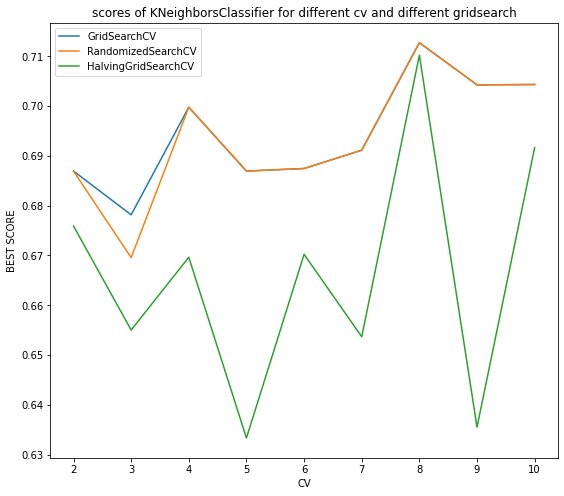

In [ ]:
knn_cv_params = {
    'weights': ['uniform', 'distance'],
    'n_neighbors': list(np.arange(1, 30))
}
cv_knn_grid_scores = [GridSearchCV(KNeighborsClassifier(n_jobs=3), param_grid=knn_cv_params, cv=cv_number).fit(features_train, target_train).best_score_
                      for cv_number in range(2, 11)]
cv_knn_random_scores = [RandomizedSearchCV(KNeighborsClassifier(n_jobs=3), param_distributions=knn_cv_params, n_iter=50, cv=cv_number).fit(features_train, target_train).best_score_
                        for cv_number in range(2, 11)]
cv_knn_halving_scores = [HalvingGridSearchCV(KNeighborsClassifier(n_jobs=3), param_grid=knn_cv_params, cv=cv_number).fit(features_train, target_train).best_score_
                         for cv_number in range(2, 11)]

plt.figure(figsize=(20, 8))
plt.subplot(122)
plt.plot(range(2, 11), cv_knn_grid_scores, label='GridSearchCV')
plt.plot(range(2, 11), cv_knn_random_scores, label='RandomizedSearchCV')
plt.plot(range(2, 11), cv_knn_halving_scores, label='HalvingGridSearchCV')
plt.title("scores of KNeighborsClassifier for different cv and different gridsearch")
plt.xlabel("CV")
plt.ylabel("BEST SCORE")
plt.legend()

In [ ]:
print(f" max score of Halving is: {max(cv_knn_halving_scores)}")
print(f" max score of Random is: {max(cv_knn_random_scores)}")
print(f" max score of Grid is: {max(cv_knn_grid_scores)}")

  max score of Halving is: 0.7102272727272727
  max score of Random is: 0.7127463054187192
  max score of Grid is: 0.7127463054187192


## Using Pipelines

In the next part, I set up a pipeline to compare the performance of these four classifiers using different search methods:

- GridSearchCV
- RandomizedSearchCV
- HalvingGridSearchCV

## Comparative Results

Here are the results of the pipeline with the best scores and parameters:

| Classifier          | Best Score | Best Classifier | Best Parameters                           |
| ------------------- | ---------- | ---------------- | ---------------------------------------- |
| GridSearchCV        | 0.804      | SVC              | {C=10, class_weight='balanced'}          |
| RandomizedSearchCV  | 0.75       | Decision Tree    | {class_weight={0: 0.3, 1: 0.7}, max_depth=6, min_samples_leaf=8} |
| HalvingGridSearchCV | 0.81       | SVC              | {C=1, class_weight='balanced'}           |

The results highlight the effectiveness of SVC with a balanced class weight using HalvingGridSearchCV, achieving the best score of 0.81.

In [ ]:
mlp_pipeline = MLPClassifier(solver='lbfgs', tol=5e-3, max_iter=500, random_state=1234)
tree_pipeline = DecisionTreeClassifier(random_state=42)
svc_pipeline = SVC(random_state=42)
knn_pipeline = KNeighborsClassifier(n_jobs=3)

# Initialize hyperparameters for each algorithm
params_mlp = {'classifier': [mlp_pipeline], 'classifier__hidden_layer_sizes': (1, 200), 'classifier__alpha': [0.001, 0.01, 1, 2]}
params_tree = {'classifier': [tree_pipeline], 'classifier__max_depth': list(range(1, 30)), 'classifier__min_samples_leaf': list(range(1, 10)), 'classifier__class_weight': ['balanced', {0: 0.3, 1: 0.7}, {0: 0.4, 1: 0.6}, {0: 0.2, 1: 0.8}, {0: 0.5, 1: 0.5}]}
params_svc = {'classifier': [svc_pipeline], 'classifier__C': [10**-2, 10**-1, 10**0, 10**1, 10**2], 'classifier__class_weight': ['balanced', {0: 1, 1: 5}, {0: 1, 1: 10}, {0: 1, 1: 25}]}
params_knn = {'classifier': [knn_pipeline], 'classifier__weights': ['uniform', 'distance'], 'classifier__n_neighbors': list(np.arange(2, 30))}

pipeline = Pipeline([('classifier', mlp_pipeline)])
params = [params_mlp, params_tree, params_svc, params_knn]

Train the GridSearchCV model

In [ ]:
grid_search = GridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='roc_auc').fit(features_train, target_train)
print(f" the best params of gridsearccv is: {grid_search.best_params_}")
print(f" the best score of gridsearccv is: {grid_search.best_score_}")

 the best params of gridsearccv is: {'classifier': SVC(C=10, class_weight='balanced', random_state=42), 'classifier__C': 10, 'classifier__class_weight': 'balanced'}
 the best score of gridsearccv is: 0.8047038831054139


Test data performance

In [ ]:
print("Test Precision:", precision_score(grid_search.predict(features_test), target_test))
print("Test Recall:", recall_score(grid_search.predict(features_test), target_test))
print("Test ROC AUC Score:", roc_auc_score(grid_search.predict(features_test), target_test))

Test Precision: 0.7450980392156863
Test Recall: 0.6551724137931034
Test ROC AUC Score: 0.7598778735632185


Train the RandomizedSearchCV model

In [ ]:
random_search = RandomizedSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='roc_auc').fit(features_train, target_train)
print(f" the best params of randomizedsearchcv is: {random_search.best_params_}")
print(f" the best score of randomizedsearchcv is: {random_search.best_score_}")

 the best params of gridsearccv is: {'classifier__min_samples_leaf': 8, 'classifier__max_depth': 6, 'classifier__class_weight': {0: 0.3, 1: 0.7}, 'classifier': DecisionTreeClassifier(class_weight={0: 0.3, 1: 0.7}, max_depth=6,
                       min_samples_leaf=8, random_state=42)}
 the best score of gridsearccv is: 0.7595738887253459


Test data performance for RandomizedSearchCV

In [ ]:
print("Precision:", precision_score(random_search.predict(features_test), target_test))
print("Recall:", recall_score(random_search.predict(features_test), target_test))
print("ROC AUC Score:", roc_auc_score(random_search.predict(features_test), target_test))

Precision: 0.7058823529411765
Recall: 0.5217391304347826
ROC AUC Score: 0.6726342710997443


Training the HalvingGridSearchCV model

In [ ]:
halving_search = HalvingGridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)
print(f" the best params of HalvingGridSearchCV is: {halving_search.best_params_}")
print(f" the best score of HalvingGridSearchCV is: {halving_search.best_score_}")

/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.5        0.46666667 0.5        ...        nan        nan        nan]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.525      0.72153846 0.525      ...        nan        nan        nan]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.5        0.46666667 0.5        ... 0.68367725 0.68732804 0.70544974]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.525      0.72153846 0.525      ... 0.6924112  0.7072277  1.        ]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWar

 the best params of HalvingGridSearchCV is: {'classifier': SVC(C=1, class_weight='balanced', random_state=42), 'classifier__C': 1, 'classifier__class_weight': 'balanced'}
 the best score of HalvingGridSearchCV is: 0.8146025835005662


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the test scores are non-finite: [0.5        0.46666667 0.5        ... 0.78394472 0.81460258 0.76983894]
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_search.py:969: UserWarning: One or more of the train scores are non-finite: [0.525      0.72153846 0.525      ... 1.         0.81673294 1.        ]
  warnings.warn(


Repeating training for HalvingGridSearchCV

In [ ]:
halving_search_repeat = HalvingGridSearchCV(pipeline, params, cv=5, n_jobs=-1, scoring='roc_auc').fit(X_train, y_train)
print(f" the best params of HalvingGridSearchCV is: {halving_search_repeat.best_params_}")
print(f" the best score of HalvingGridSearchCV is: {halving_search_repeat.best_score_}")

 the best params of HalvingGridSearchCV is: {'classifier': SVC(C=1, class_weight='balanced', random_state=42), 'classifier__C': 1, 'classifier__class_weight': 'balanced'}
 the best score of HalvingGridSearchCV is: 0.8146025835005662


Evaluating test data performance

In [ ]:
print("Precision:", precision_score(halving_search_repeat.predict(X_test), y_test))
print("Recall:", recall_score(halving_search_repeat.predict(X_test), y_test))
print("ROC AUC Score:", roc_auc_score(halving_search_repeat.predict(X_test), y_test))

Precision: 0.803921568627451
Recall: 0.5616438356164384
ROC AUC Score: 0.7190935227464907
